In [ ]:
# modules that will be used for this exercise
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LassoCV
import statsmodels.api as sm
import numpy as np


In [ ]:
df = pd.read_csv('/housing.csv')
print(df.shape)
print(df.describe())

(20640, 10)
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%     

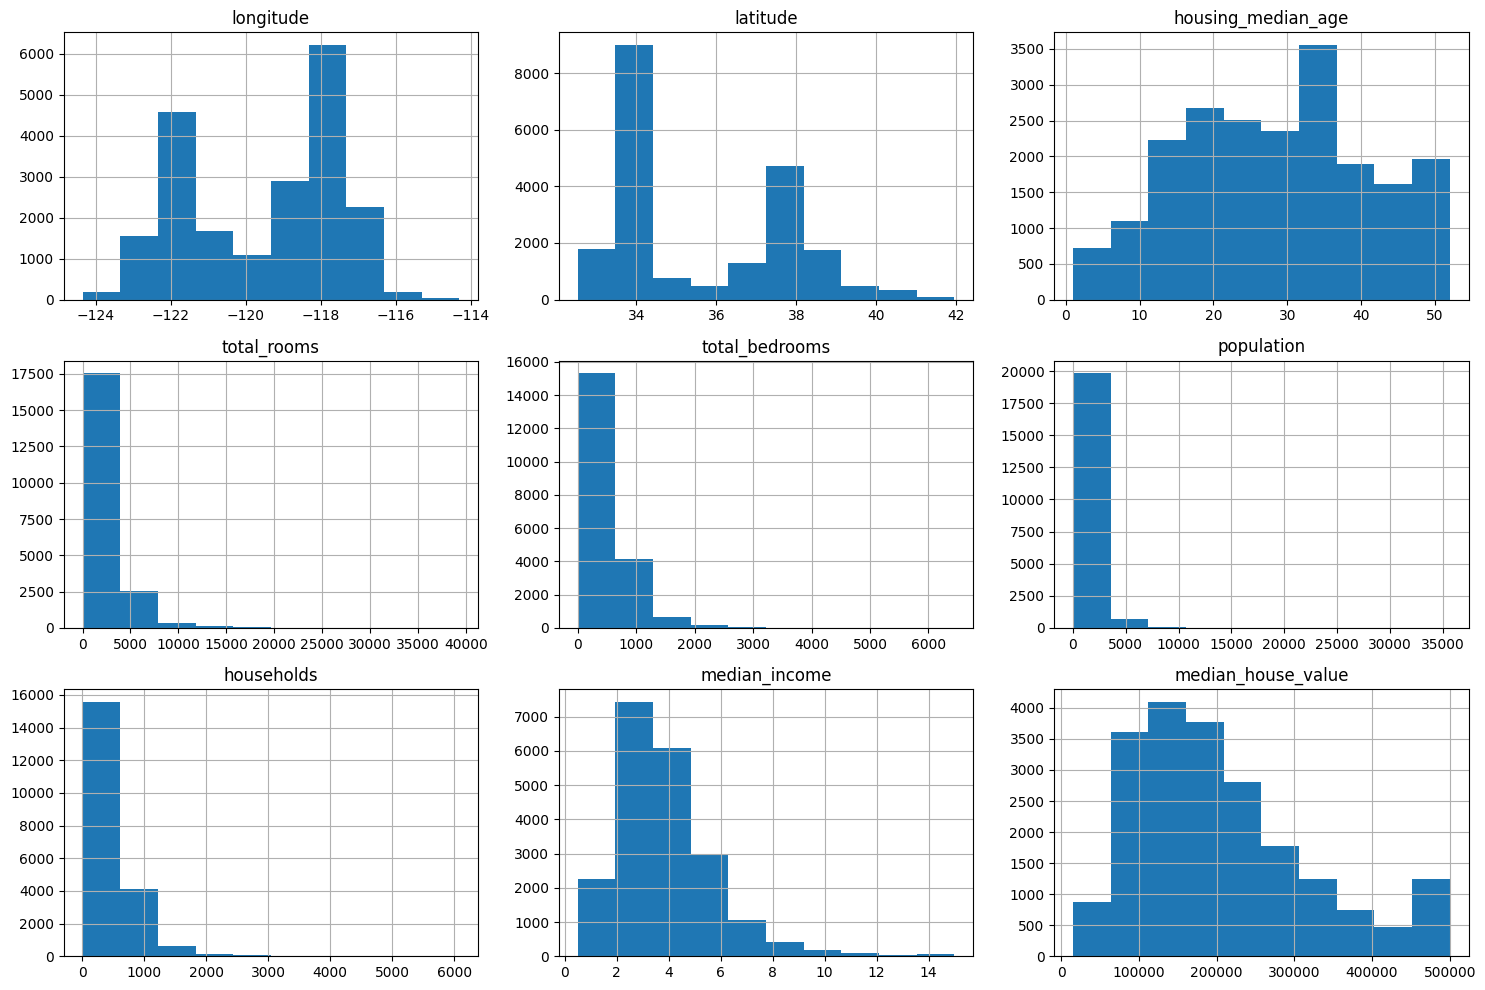

In [ ]:
# histograms for each numeric column
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

Visualizing relationships between some variables and median house value.


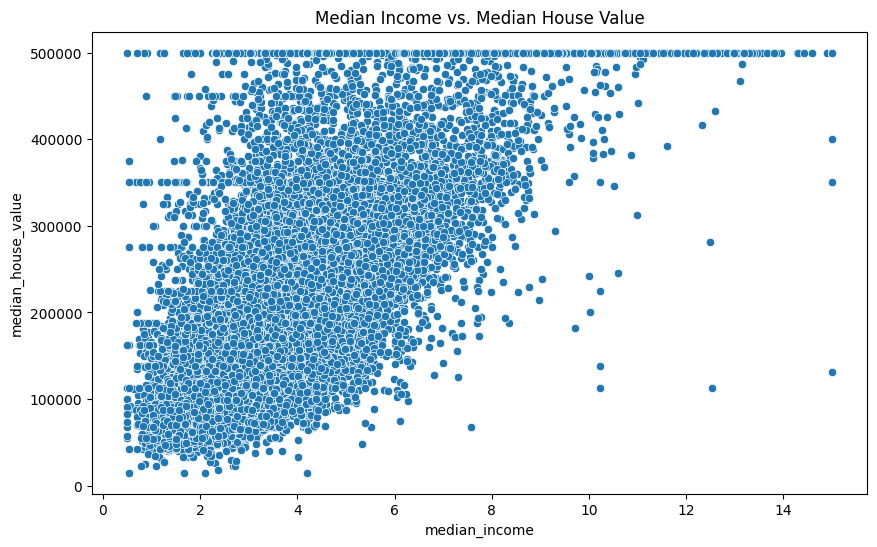

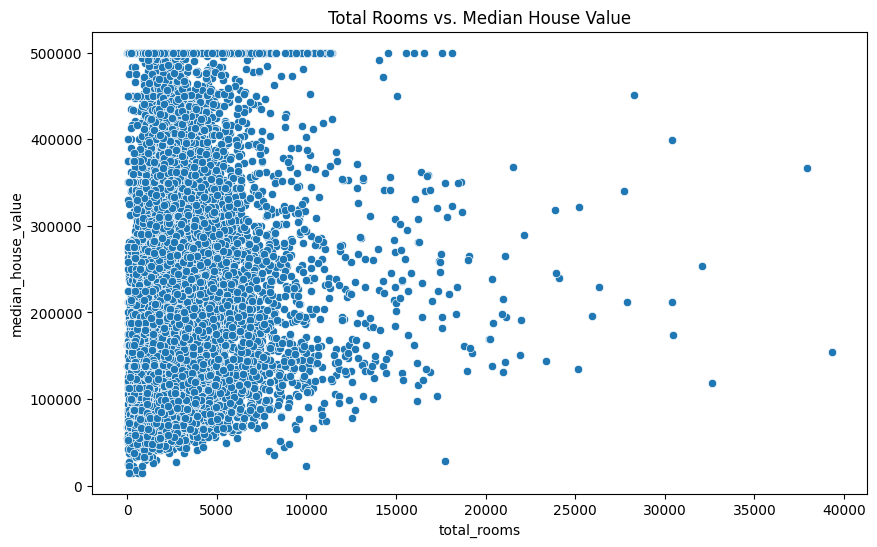

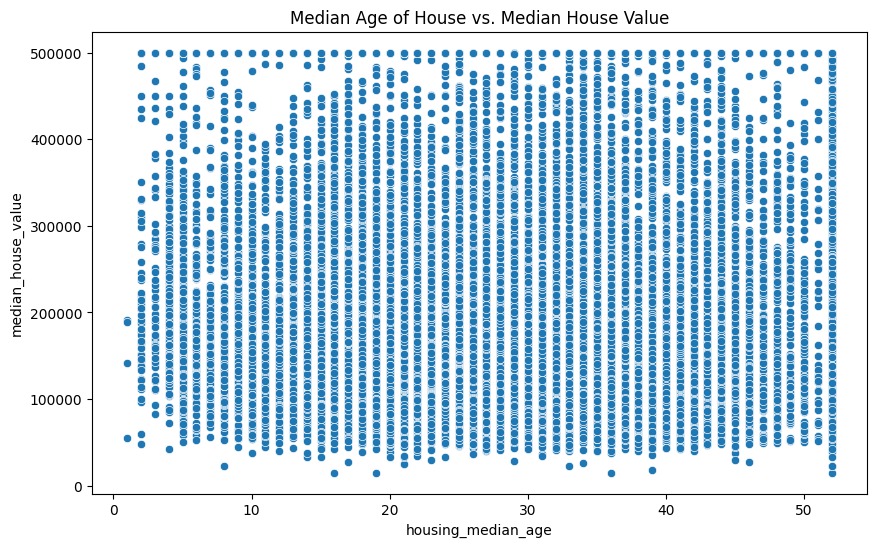

In [ ]:
# scatter plot to visualize the relationship between median income and median house value
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['median_income'], y=df['median_house_value'])
plt.title('Median Income vs. Median House Value')
plt.show()

# relationship between total house and median house value
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['total_rooms'], y=df['median_house_value'])
plt.title('Total Rooms vs. Median House Value')
plt.show()

# relationship between housing median age and median house value
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['housing_median_age'], y=df['median_house_value'])
plt.title('Median Age of House vs. Median House Value')
plt.show()

In [ ]:
# cleaning the data
missing = df.isnull().sum()
print(missing)

# drop missing valuess
df = df.dropna()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [ ]:
# checking which columns are categorical
print(df.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [ ]:
# converting ocean_proximity column to numerical
df_new = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=False)
print(df_new.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                          0                       0                       0   
1   

In [ ]:
# splitting data into training set and testing set.
# separate features and target variable
X = df_new.drop('median_house_value', axis=1)  # Features (all columns except 'median_house_value')
y = df_new['median_house_value']               # Target variable

# split the dataset: % 20 testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create the linear regression model and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on train and test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# estimate the coefficients
coeff = model.coef_
intercept = model.intercept_
print(f"Intercept:", {intercept})
print("Coefficients:")
for column, coef in zip(X.columns, coeff):
    print(f"{column}: {coef:.4f}")

Intercept: {-2221103.869896785}
Coefficients:
longitude: -26597.9049
latitude: -25475.6431
housing_median_age: 1090.5496
total_rooms: -5.0744
total_bedrooms: 88.2563
population: -43.0011
households: 71.4550
median_income: 38727.8999
ocean_proximity_<1H OCEAN: -22478.2412
ocean_proximity_INLAND: -61501.2399
ocean_proximity_ISLAND: 130714.4273
ocean_proximity_NEAR BAY: -27251.8843
ocean_proximity_NEAR OCEAN: -19483.0620


In [ ]:
# evaluate the model using MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE: {test_mse:.2f}")
print(f"Training R2: {train_r2:.2f}")
print(f"Testing R2: {test_r2:.2f}")

Training MSE: 4653891020.26
Testing MSE: 4969622592.45
Training R2: 0.65
Testing R2: 0.64


In [ ]:
# variable selection using LASSO
lasso = LassoCV(cv=5).fit(X_train, y_train)
selected_features = np.where(lasso.coef_ != 0)[0]
print("Selected features:", X_train.columns[selected_features])


Selected features: Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income'],
      dtype='object')


In [ ]:
# Build another model using selected variables
X_train_selected = X_train[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
X_test_selected = X_test[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
# new Linear Regression Model using selected variables
model_selected = LinearRegression()
model_selected.fit(X_train_selected, y_train)
# Make predictions
y_train_pred_selected = model_selected.predict(X_train_selected)
y_test_pred_selected = model_selected.predict(X_test_selected)
# evaluate the model using MSE
train_mse_selected = mean_squared_error(y_train, y_train_pred_selected)
test_mse_selected = mean_squared_error(y_test, y_test_pred_selected)

train_r2_selected = r2_score(y_train, y_train_pred_selected)
test_r2_selected = r2_score(y_test, y_test_pred_selected)

print(f"Training MSE : {train_mse_selected:.2f}")
print(f"Testing MSE : {test_mse_selected:.2f}")
print(f"Training R2 : {train_r2_selected:.2f}")
print(f"Testing R2 : {test_r2_selected:.2f}\n")

print("Compared to first model")
print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE: {test_mse:.2f}")
print(f"Training R2: {train_r2:.2f}")
print(f"Testing R2: {test_r2:.2f}")


Training MSE : 5694416284.85
Testing MSE : 6114770487.11
Training R2 : 0.57
Testing R2 : 0.55

Compared to first model
Training MSE: 4653891020.26
Testing MSE: 4969622592.45
Training R2: 0.65
Testing R2: 0.64


In [ ]:
# better-performing model was the original model before selection
# predict the median house value for given location
new_data = {
    'longitude': [-122.25],
    'latitude': [37.85],
    'housing_median_age': [40],
    'total_rooms': [880],
    'total_bedrooms': [129],
    'population': [322],
    'households': [126],
    'median_income': [8.3],
    'ocean_proximity_<1H OCEAN': [1],
    'ocean_proximity_INLAND': [0],
    'ocean_proximity_ISLAND': [0],
    'ocean_proximity_NEAR BAY': [0],
    'ocean_proximity_NEAR OCEAN': [0]
}

# convert to a DataFrame
predicted_value_df = pd.DataFrame(new_data)

# using the original model to make a prediction
predicted_value = model.predict(predicted_value_df)

print(f"Predicted Median House Value: ${predicted_value[0]:,.2f}")


Predicted Median House Value: $410,898.83


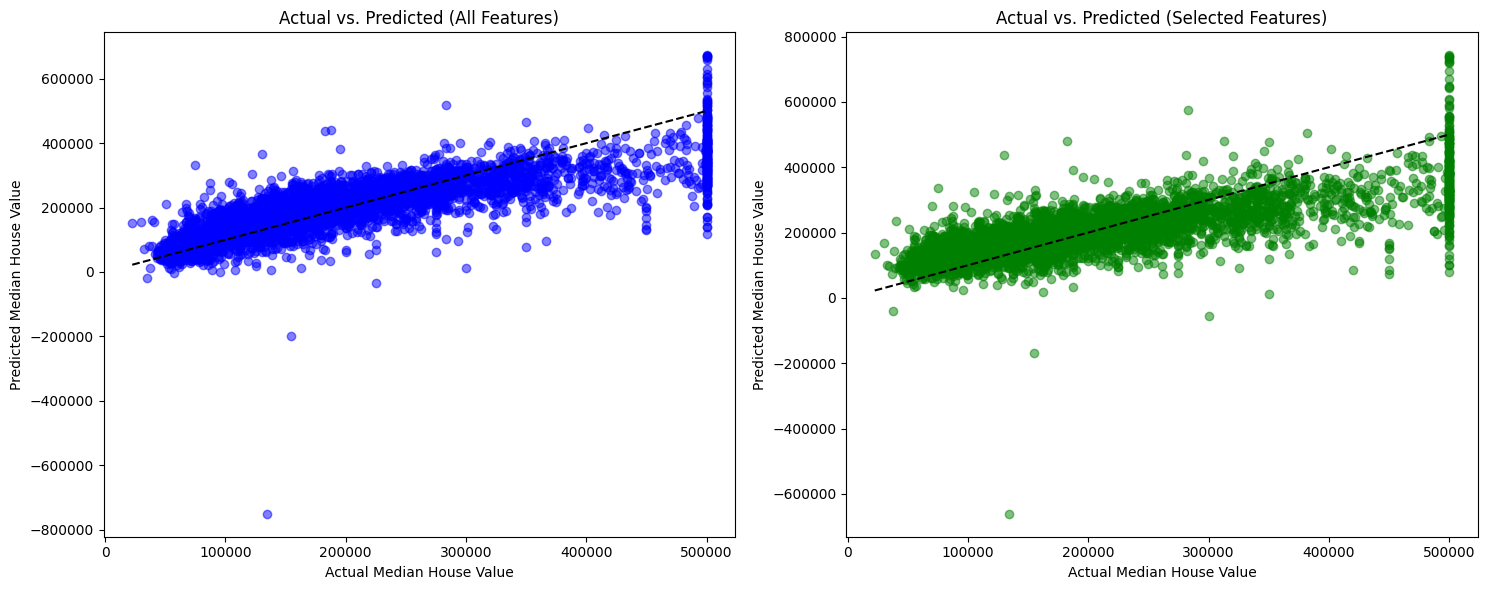

In [ ]:
# predictions using the original model with all features
y_test_pred_all = model.predict(X_test)

# predictions using the model with selected features
y_test_pred_selected = model_selected.predict(X_test_selected)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# scatter plot for original model
ax[0].scatter(y_test, y_test_pred_all, alpha=0.5, color='blue')
ax[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k')
ax[0].set_xlabel('Actual Median House Value')
ax[0].set_ylabel('Predicted Median House Value')
ax[0].set_title('Actual vs. Predicted (All Features)')

# scatter plot for model with selected features
ax[1].scatter(y_test, y_test_pred_selected, alpha=0.5, color='green')
ax[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k')
ax[1].set_xlabel('Actual Median House Value')
ax[1].set_ylabel('Predicted Median House Value')
ax[1].set_title('Actual vs. Predicted (Selected Features)')

plt.tight_layout()
plt.show()


In [ ]:
!jupyter nbconvert --to html /AMS380HW2.ipynb

[NbConvertApp] Converting notebook /AMS380HW2.ipynb to html
[NbConvertApp] Writing 1647622 bytes to /AMS380HW2.html
